In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cmath
import scipy.constants as const
import math


In [62]:
meV2J = 1.60218e-22
U_0 = 8000 * meV2J


'''
def coefficients(energy, length): # energy in meV and length in Angstom
    E = energy*10**-3
    L_b = length*10**-10
    # L_b = length
    alpha = np.sqrt((2*m*(U_0-E))/(h_bar**2))
    beta = np.sqrt((2*m*(E))/(h_bar**2))
    k = np.sqrt((2*m*(E))/(h_bar**2))
    # print(alpha, beta)

    B=((alpha+beta*1j)*(alpha-k*1j)*np.exp(-alpha*L_b) - (alpha-beta*1j)*(alpha+k*1j)*np.exp(alpha*L_b))
    A=((alpha+beta*1j)*(alpha+k*1j)*np.exp(-alpha*L_b) - (alpha-beta*1j)*(alpha-k*1j)*np.exp(alpha*L_b))
    F=(-4*alpha*k*1j)


    r = B/A*np.exp(-beta*L_b*1j)
    t = F/A*np.exp(-beta*L_b*1j)
    
    return r,t


r,t = coefficients(100, 10)
# print(B, A, F)
print(r)
print(t)
'''


'\ndef coefficients(energy, length): # energy in meV and length in Angstom\n    E = energy*10**-3\n    L_b = length*10**-10\n    # L_b = length\n    alpha = np.sqrt((2*m*(U_0-E))/(h_bar**2))\n    beta = np.sqrt((2*m*(E))/(h_bar**2))\n    k = np.sqrt((2*m*(E))/(h_bar**2))\n    # print(alpha, beta)\n\n    B=((alpha+beta*1j)*(alpha-k*1j)*np.exp(-alpha*L_b) - (alpha-beta*1j)*(alpha+k*1j)*np.exp(alpha*L_b))\n    A=((alpha+beta*1j)*(alpha+k*1j)*np.exp(-alpha*L_b) - (alpha-beta*1j)*(alpha-k*1j)*np.exp(alpha*L_b))\n    F=(-4*alpha*k*1j)\n\n\n    r = B/A*np.exp(-beta*L_b*1j)\n    t = F/A*np.exp(-beta*L_b*1j)\n    \n    return r,t\n\n\nr,t = coefficients(100, 10)\n# print(B, A, F)\nprint(r)\nprint(t)\n'

In [63]:
def amplitudes(energy, length, method="slides"):
    # B,A,F = coefficients(energy, length)
    # r = B/A
    # t = F/A
    E = energy*meV2J
    L_b = length * 1e-10
    beta = np.sqrt((2*const.m_e*(U_0-E))/(const.hbar**2))
    k = np.sqrt((2*const.m_e*(E))/(const.hbar**2))

    r=((beta+1j*k)*(beta-1j*k)*np.exp(-beta*L_b)-(beta-1j*k)*(beta+1j*k)*np.exp(beta*L_b))/((beta+1j*k)*(beta+1j*k)*np.exp(-beta*L_b)-(beta-1j*k)*(beta-1j*k)*np.exp(beta*L_b))*np.exp(-1j*k*L_b)
    t=-4j*beta*k/((beta+1j*k)*(beta+1j*k)*np.exp(-beta*L_b)-(beta-1j*k)*(beta-1j*k)*np.exp(beta*L_b))*np.exp(-1j*k*L_b)
    return r,t

def probabilities(energy, length):
    r,t = amplitudes(energy, length)
    R = np.abs(r)**2
    T = np.abs(t)**2
    return R, T

def full_tranmission(energy, thickness, gap):
    E_just_for_k = energy*meV2J
    k = np.sqrt((2*const.m_e*(E_just_for_k))/(const.hbar**2))
    L = gap * 1e-10
    r,t = amplitudes(energy, thickness)
    return np.abs((t**2)/(1-r**2*np.exp(2j*k*L)))**2

def full_transmission_general(energy, thickness1, thickness2, gap):
    E_just_for_k = energy*meV2J
    k = np.sqrt((2*const.m_e*(E_just_for_k))/(const.hbar**2))
    r1,t1 = amplitudes(energy, thickness1)
    r2,t2 = amplitudes(energy, thickness2)
    L = gap * 1e-10
    return np.abs((t1*t2)/(1-r1*r2*np.exp(2j*k*L)))**2

/tmp/ipykernel_977535/2133328594.py:25: RuntimeWarning: invalid value encountered in divide
  return np.abs((t**2)/(1-r**2*np.exp(2j*k*L)))**2


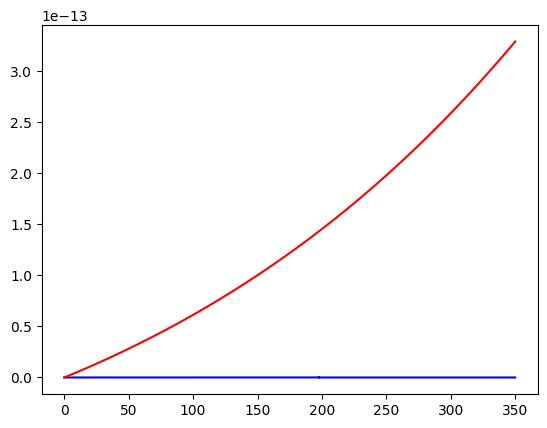

In [64]:
energies = np.linspace(0, 350, 1000000)
reflections, transmissions = probabilities(energies, 10)
full_transmissions = full_tranmission(energies, 10, 50)
# plt.plot(energies, reflections, 'r')
plt.plot(energies, full_transmissions, 'b')
plt.plot(energies, transmissions, 'r')
#plt.ylim(0,1.1)

/tmp/ipykernel_977535/2133328594.py:25: RuntimeWarning: invalid value encountered in divide
  return np.abs((t**2)/(1-r**2*np.exp(2j*k*L)))**2


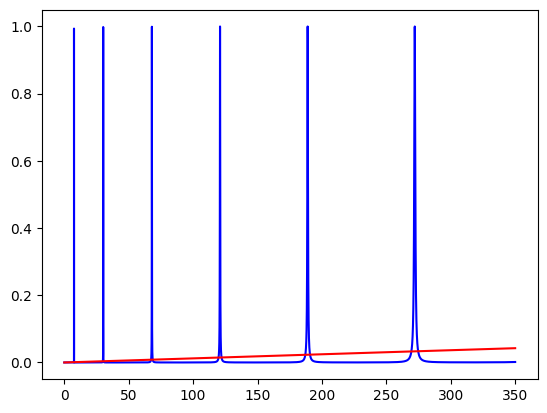

In [67]:
energies = np.linspace(0, 350, 100000)
thickness_of_walls = 1
reflections, transmissions = probabilities(energies, thickness_of_walls)
full_transmissions = full_tranmission(energies, thickness_of_walls, 70)
# plt.plot(energies, reflections, 'r')
plt.plot(energies, full_transmissions, 'b')
plt.plot(energies, transmissions, 'r')

/tmp/ipykernel_977535/2133328594.py:33: RuntimeWarning: invalid value encountered in divide
  return np.abs((t1*t2)/(1-r1*r2*np.exp(2j*k*L)))**2


(0.0, 1.1)

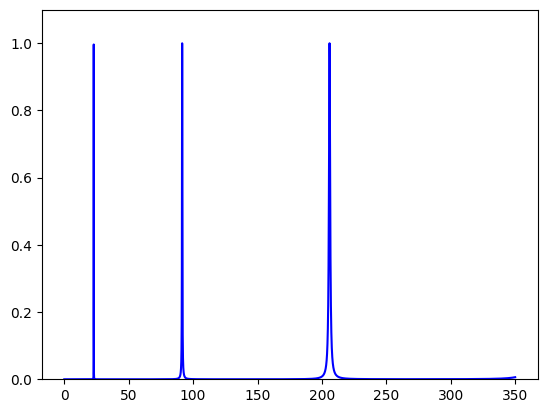

In [66]:
full_transmissions_gen = full_transmission_general(energies, 1, 1, 40)
# plt.plot(energies, reflections, 'r')
plt.plot(energies, full_transmissions_gen, 'b')
#plt.plot(energies, transmissions, 'r')
plt.ylim(0,1.1)